## Exercici
Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips"

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#importem el dataset
pd.options.display.max_columns = None
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets" + os.sep

file = "tips.csv"
df = pd.read_csv(datasets_path + file, sep=',', encoding='utf8')
df.sample(3)

,total_bill,tip,sex,smoker,day,time,size
113,23.95,2.55,Male,No,Sun,Dinner,2
232,11.61,3.39,Male,No,Sat,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


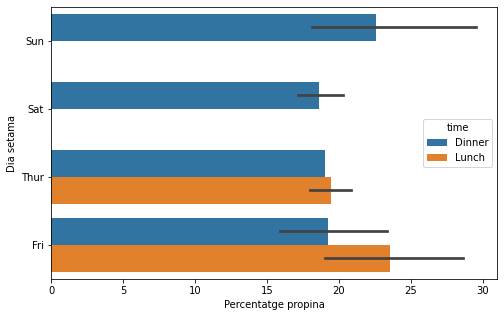

In [4]:
#creem columna percentatge de propina
df['tip_pct'] = round(df['tip']*100 / (df['total_bill'] - df['tip']))

plt.figure(figsize =(8, 5))
sns.barplot(x='tip_pct', y='day', hue='time', data=df, orient='h')
plt.xlabel('Percentatge propina')
plt.ylabel('Dia setama')
plt.show()

In [5]:
#crearem una funció que donada una series ens retorni dues llistes amb q25, q50, q75 i límits de atípics i els labels
def genera_quantils_limits(series):
    v = list(np.quantile(series, [.25,.5,.75]))
    ric = v[2] - v[0]
    lim = [v[0] - 1.5 * ric, v[2] + 1.5 * ric]
    v.extend(lim)
    l = ["Q25%", "Mitjana", "Q75%", "mínim no atípic", "màxim no atípic"]
    return l, v

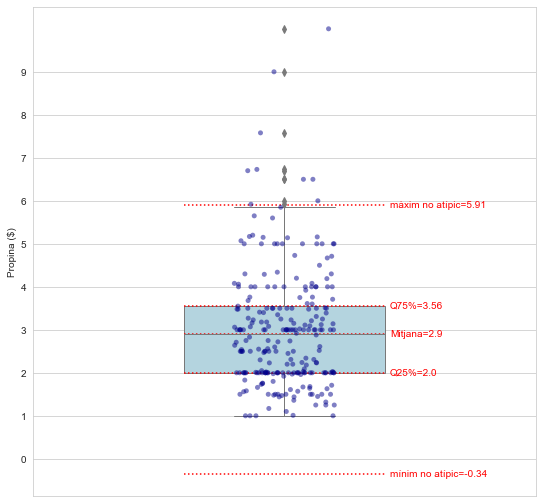

In [6]:
#boxplot + stripplot de les propines (exemple a EXAMINING DATA)
plt.figure(figsize =(9, 9))
boxwidth = .4
sns.set_style("whitegrid")
ax = sns.boxplot(y="tip", data=df,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=boxwidth)
ax = sns.stripplot(y=df["tip"], orient='v', color='darkblue', alpha= 0.5)

# dibuixem el grid en xifres rodones d'un en un (veiem concentracions pròpies de donar la propina en una quantitat rodona)
plt.yticks(np.arange(0, 10, step=1))

#dibuixem els quantils q25, q50, q75, i límits de valors atípics (vermells)
labels, values = genera_quantils_limits(df['tip'])
plt.hlines(y=values, xmin=-boxwidth/2, xmax=boxwidth/2, colors="r", linestyles="dotted")
for i in range(len(labels)):
    plt.annotate(text=labels[i]+"="+str(values[i].round(2)), xy=(boxwidth/2 + .01, values[i]), 
                 horizontalalignment='left', verticalalignment='center', color="r")

plt.ylabel('Propina ($)')
plt.show()

### Una variable numèrica

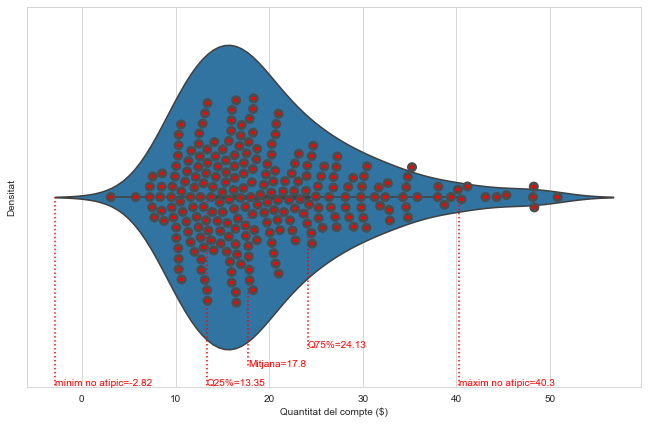

In [7]:
#per fer casos diferents als de l'exercici referit, agafarem diferents variables. 
#Aquí observarem total_bill en violinplot amb un swarmplot
plt.figure(figsize =(11, 7))
sns.set_style("whitegrid")
sns.violinplot(data=df, x="total_bill")
sns.swarmplot(data=df, x="total_bill", color="r", linewidth=3, size=7)

#dibuixem els quantils q25, q50, q75 i el rang de atípics (vermells)
labels, values = genera_quantils_limits(df['total_bill'])
for i in range(3):
    plt.vlines(x=values[i], ymin=0, ymax=.5 - i*.05, colors="r", linestyles="dotted")
    plt.annotate(text=labels[i]+"="+str(values[i].round(2)), xy=(values[i], .5 - i*.05), 
                 horizontalalignment='left', verticalalignment='bottom', color="r")
for i in range(3, 5):
    plt.vlines(x=values[i], ymin=0, ymax=.5, colors="r", linestyles="dotted")
    plt.annotate(text=labels[i]+"="+str(values[i].round(2)), xy=(values[i], .5), 
                 horizontalalignment='left', verticalalignment='bottom', color="r")

plt.xlabel('Quantitat del compte ($)')
plt.ylabel('Densitat')
plt.show()

### Variable categòrica i una numèrica

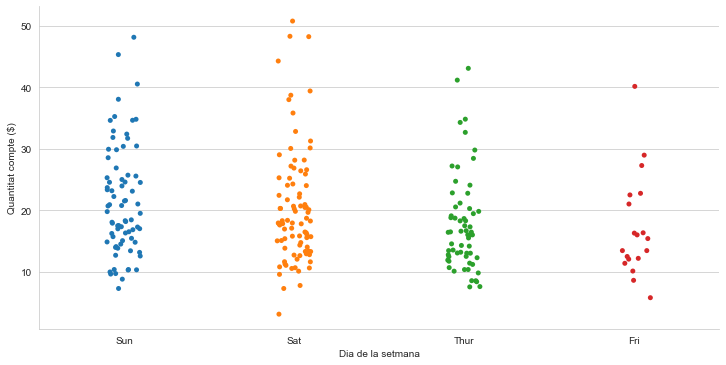

In [8]:
#quantitats per dia de la setmana en scatterplot agrupat
sns.set_style("whitegrid")
sns.catplot(x="day", y="total_bill", data=df, height=5, aspect=2)
plt.xlabel('Dia de la setmana')
plt.ylabel('Quantitat compte ($)')
plt.show()

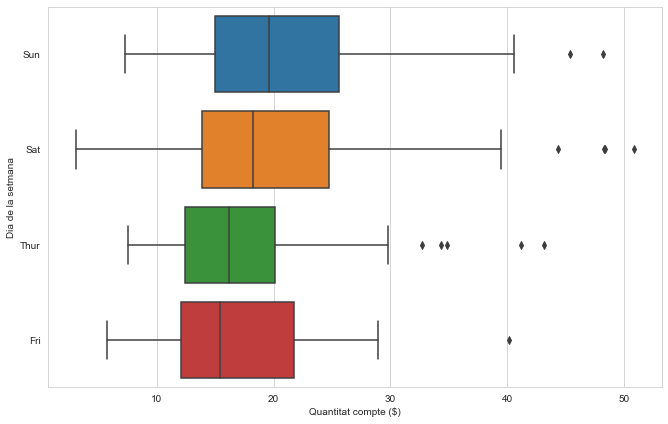

In [9]:
#quantitats per dia de la setmana en boxplots
plt.figure(figsize =(11, 7))
sns.set_style("whitegrid")
sns.boxplot(x="total_bill", y="day", data=df, orient="h")
plt.ylabel('Dia de la setmana')
plt.xlabel('Quantitat compte ($)')
plt.show()

### Dues variables categòriques, una numèrica

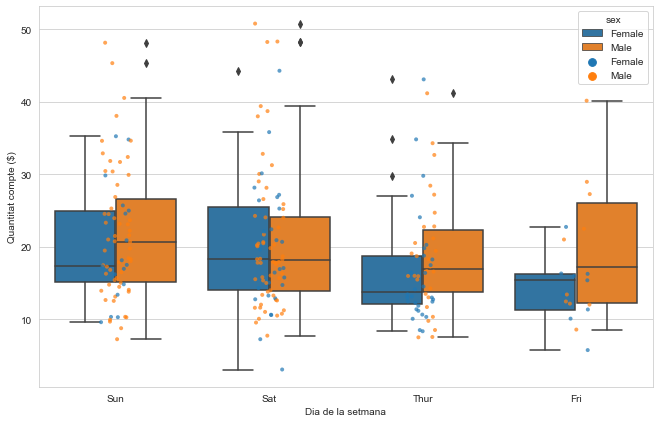

In [10]:
#quantitats per dia de la setmana i per sexe en boxplots i scatterplots agrupats
plt.figure(figsize =(11, 7))
sns.boxplot(x='day', y='total_bill', hue = 'sex', data=df, orient='v')
sns.stripplot(x='day', y='total_bill', hue='sex', data=df, orient='v', alpha= 0.7, size=4)
plt.xlabel('Dia de la setmana')
plt.ylabel('Quantitat compte ($)')
plt.show()

<Figure size 792x504 with 0 Axes>

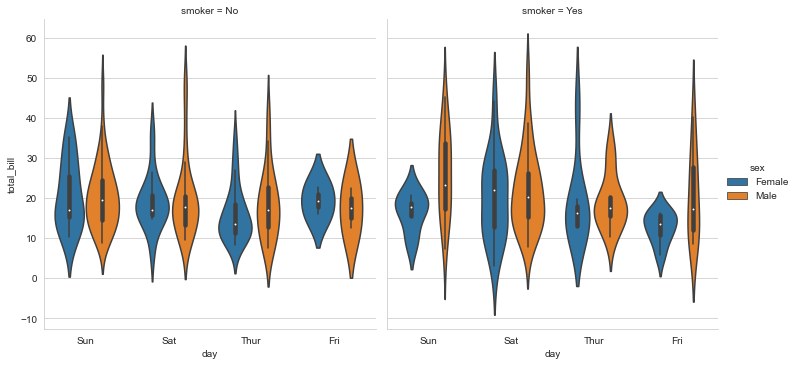

In [11]:
#podriem afegir fins i tot una variable més (smoker) afegint-la com a columna
plt.figure(figsize =(11, 7))
g=sns.catplot(x='day', y='total_bill', hue = 'sex', col='smoker', data=df, orient='v', kind='violin')
plt.show()

## Exercici
Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [53]:
pd.options.display.max_columns = None
datasets_path = r"D:\Oscar\FORMACIO\DIGITAL\DATA SCIENCE with Python\Datasets" + os.sep

file = "movies.dat"
movie_column_l = ['ID', 'TITOL', 'GENERES']
df = pd.read_table(datasets_path + file, sep='::', header=None, names=movie_column_l, engine='python')

#extraiem l'any de TITOL en una nova columna ANY (int)
import re
pattern = r"\(([1-2][0-9][0-9][0-9])\)"
df["ANY"] = df["TITOL"].apply(lambda x: int(re.search(pattern, x).group(1)))
#Esborrem l'any del titol
pattern = r" +\(.*\)"
df["TITOL"] = df["TITOL"].apply(lambda x: re.sub(pattern, "", x))
df.tail(2)

,ID,TITOL,GENERES,ANY
3881,3951,Two Family House,Drama,2000
3882,3952,"Contender, The",Drama|Thriller,2000


In [54]:
#aplicant get_dummies amb separador sobre els string methods de la columna, extraiem la matriu indicadora a partir
#de tots possibles valors de la variable categòrica (GÈNERE en aquest cas)
dummy_df = df.GENERES.str.get_dummies(sep='|')
dummy_df.tail(2)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [55]:
#concatenem els dataframes per columnes
df = df.join(dummy_df)
df.tail(2)

,ID,TITOL,GENERES,ANY,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3881,3951,Two Family House,Drama,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3882,3952,"Contender, The",Drama|Thriller,2000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Una variable numèrica

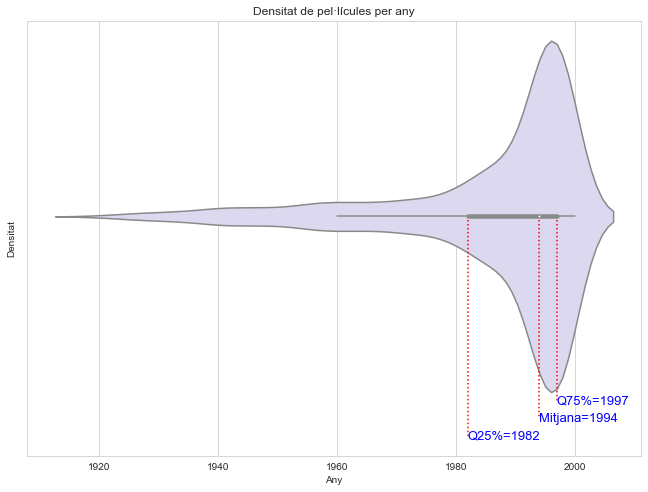

In [15]:
#Visualitzarem la densitat del nombre de pel·licules per anys (variable numèrica discreta) del dataset, primer amb violinplot
plt.figure(figsize =(11, 8))
sns.set_style("whitegrid")
sns.violinplot(data=df, x="ANY", palette="ch:2")

#dibuixem els quantils q25, q50, q75 (vermell)
labels, values = genera_quantils_limits(df['ANY'])
for i in range(3):
    plt.vlines(x=values[i], ymin=0, ymax=.5 - i*.04, colors="r", linestyles="dotted")
    plt.annotate(text=labels[i]+"="+str(int(values[i])), xy=(values[i], .5 - i*.04), 
                 horizontalalignment='left', verticalalignment='center', color="b", size=13)
    
plt.title("Densitat de pel·lícules per any")
plt.xlabel('Any')
plt.ylabel('Densitat')
plt.show()

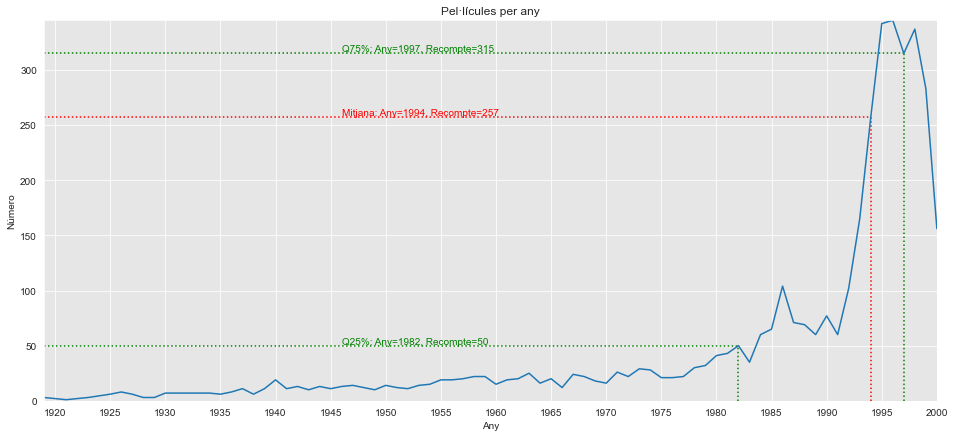

In [16]:
#Podriem mostrar-ho amb un lineplot amb els quantils típics per donar-li un sentit de continuïtat temporal a la variable ANY
data = df.ANY.value_counts()
plt.figure(figsize =(16, 7))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.lineplot(x=data.index, y=data.values)

#dibuixem els quantils q25, q50, q75
labels, values = genera_quantils_limits(df['ANY'])
colors = ["g", "r", "g"]
for i in range(3):
    year = int(values[i])
    count = df["ANY"].value_counts()[year]
    text = "{0}: Any={1}, Recompte={2}".format(labels[i], str(year), count)
    plt.vlines(x=year, ymin=0, ymax=data[year], colors=colors[i], linestyles="dotted")
    x_text = data.index.min() + (data.index.max() - data.index.min()) / 3
    plt.annotate(text=text, xy=(x_text, count), color=colors[i],
                 horizontalalignment='left', verticalalignment='bottom')
    plt.hlines(y=data[year], xmin=min(data.index), xmax=year, colors=colors[i], linestyles="dotted")

plt.title("Pel·lícules per any")
plt.xlabel('Any')
plt.ylabel('Número')
plt.xticks(np.arange(data.index.min()+1, data.index.max()+1, step=5))
plt.ylim(0, data.values.max())
plt.xlim(data.index.min(), data.index.max())
plt.show()

### Variable categòrica i una numèrica

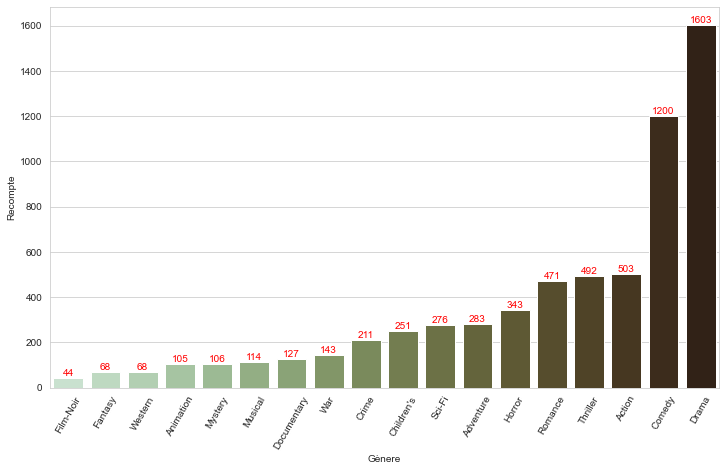

In [17]:
#Dibuixarem el número de pel·licules per cada gènere a la base de dades (hi ha pel·lícules amb més d'un gènere)
data = dummy_df.apply(np.sum).sort_values()

plt.figure(figsize =(12, 7))
sns.set_style("whitegrid")
sns.barplot(x=data.index, y=data.values, palette="ch:1")
for i in range(len(data)):
    plt.annotate(text=int(data.values[i]), xy=(i, data.values[i]), 
                 horizontalalignment='center', verticalalignment='bottom', color="r")
plt.xlabel("Gènere")
plt.ylabel("Recompte")
plt.xticks(rotation=60)
plt.show()

### Dues variables categòriques, una numèrica

In [66]:
#Per obtenir una segona variable categòrica discretitzarem els anys per dècades, mirem el rang dels anys
primer = df["ANY"].min()
ultim = df["ANY"].max()
primer, ultim

(1919, 2000)

In [67]:
#obtenim els bins i els noms de les categoritzacions
bins = list(range(primer-10, ultim+10, 10))
decades = [(str(x+1)[-2:] + "s") for x in bins]
decades.pop()
bins, decades

([1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009],
 ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s'])

In [68]:
#agrupem per any
data = df.groupby("ANY")[dummy_df.columns].sum()
data.tail(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
ANY,,,,,,,,,,,,,,,,,,
1998,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
1999,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1
2000,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0


In [69]:
#discetitzem els anys per les dècades generades
data.reset_index(inplace=True)
data["ANY"] = pd.cut(data.ANY, bins, labels=decades)
data.rename(columns={"ANY": "DECADA"}, inplace=True)
data.tail(3)

,DECADA,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
78,90s,44,16,8,18,112,25,18,166,2,3,15,3,10,58,17,51,5,1
79,90s,27,7,7,11,103,12,15,130,2,0,14,1,5,37,15,40,4,1
80,00s,19,6,8,9,69,8,8,55,1,0,8,1,1,17,10,25,2,0


In [70]:
#agrupem per decada, sumant els gèneres, i generem la nova taula de dècades i gèneres
data = data.groupby("DECADA")[dummy_df.columns].sum()
data.sample(3)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
DECADA,,,,,,,,,,,,,,,,,,
50s,10,13,5,10,25,7,1,62,4,9,20,17,7,18,32,16,13,7
40s,2,6,11,13,22,8,0,44,0,17,14,14,9,14,1,17,11,7
90s,299,130,52,139,743,139,105,1036,33,10,120,30,61,333,121,322,55,19


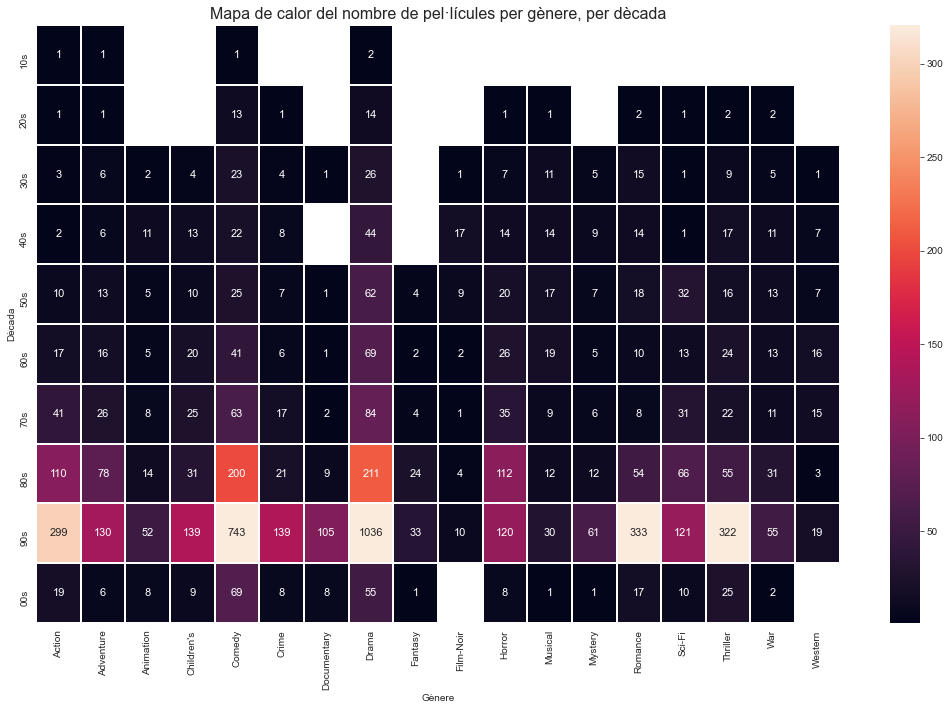

In [71]:
#dibuixem ara el mapa de calor. No mostrem les caselles amb valor 0
plt.figure(figsize =(18, 11))
mask = data == 0
sns.heatmap(data, annot=True, annot_kws={"size": 11}, robust=True, fmt='.0f', mask=mask, linewidths=1, linecolor="w")
plt.title("Mapa de calor del nombre de pel·lícules per gènere, per dècada", fontdict={'fontsize':16})
plt.xlabel("Gènere")
plt.ylabel("Dècada")
plt.show()

## Exercici 
Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

*Podríem evaluar com es combinen tots els gèneres entre sí en un spider plot.*

*Crearem un programa pq l'usuari decideixi quin gènere/s vol comparar amb tots els demés (amb un màxim de 3, sinó es carrega molt la visualització)*

*En el cas que sigui un sol gènere, graficarem els valors de coincidències amb tots els demés.*

*En el cas que sigui més d'un gènere a comparar amb els demés, no dibuixarem la coincidència amb sí mateix (que serà el nombre de pel·licules d'aquell gènere) perquè ens deixa molt petit el dibuix de la coincidencia amb els demés, però si que mostrarem aquest nombre de pel·licules al label del gènere que estem comparant*

In [72]:
#Crearem un nou dataframe fent un creuament de les columnes, que ens demaní l'usuari, entre sí. 
#Fem l'exemple per totes les columnes:
data = pd.DataFrame()
for genere in dummy_df.columns:
    series = dummy_df[dummy_df[genere] == 1].apply(np.sum)
    series.rename(genere, inplace=True)
    data = data.append(series)
data

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Action,503.0,128.0,4.0,13.0,65.0,55.0,0.0,100.0,15.0,0.0,25.0,3.0,12.0,35.0,107.0,133.0,46.0,10.0
Adventure,128.0,283.0,14.0,81.0,44.0,9.0,0.0,33.0,35.0,1.0,8.0,9.0,3.0,27.0,67.0,31.0,12.0,4.0
Animation,4.0,14.0,105.0,84.0,25.0,0.0,0.0,1.0,6.0,1.0,1.0,32.0,1.0,4.0,8.0,4.0,2.0,0.0
Children's,13.0,81.0,84.0,251.0,93.0,0.0,0.0,27.0,38.0,0.0,1.0,37.0,2.0,7.0,14.0,1.0,2.0,2.0
Comedy,65.0,44.0,25.0,93.0,1200.0,36.0,4.0,226.0,19.0,1.0,41.0,41.0,13.0,204.0,31.0,31.0,18.0,17.0
Crime,55.0,9.0,0.0,0.0,36.0,211.0,0.0,90.0,1.0,15.0,6.0,0.0,13.0,9.0,6.0,58.0,0.0,0.0
Documentary,0.0,0.0,0.0,0.0,4.0,0.0,127.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
Drama,100.0,33.0,1.0,27.0,226.0,90.0,4.0,1603.0,9.0,6.0,12.0,15.0,32.0,204.0,23.0,110.0,76.0,13.0
Fantasy,15.0,35.0,6.0,38.0,19.0,1.0,0.0,9.0,68.0,0.0,0.0,2.0,0.0,7.0,13.0,1.0,1.0,0.0
Film-Noir,0.0,1.0,1.0,0.0,1.0,15.0,0.0,6.0,0.0,44.0,1.0,0.0,8.0,1.0,2.0,20.0,0.0,0.0


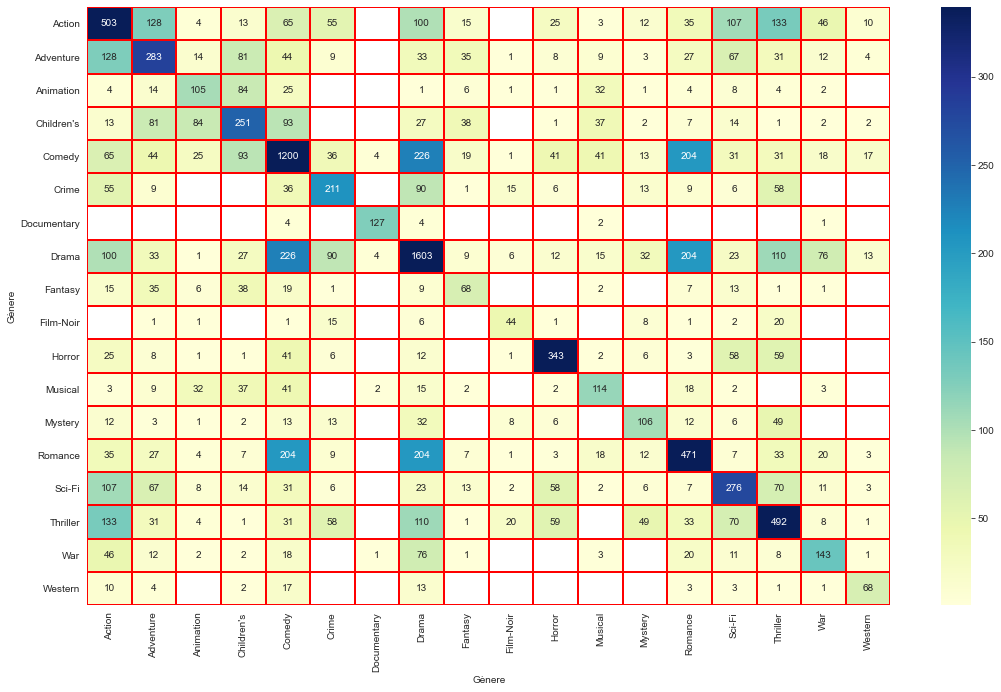

In [73]:
#de l'exemple podriem visualitzar tb el mapa de calor dels valors creuats. No dibuixarem tampoc les caselles amb valor 0
plt.figure(figsize =(18, 11))
mask = data == 0
sns.heatmap(data, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", fmt='.0f', 
            mask=mask, robust=True, linewidths=1, linecolor="r")
plt.xlabel("Gènere")
plt.ylabel("Gènere")
plt.show()

In [25]:
#definim la funció que ens genera el dataframe de suma de valors creuats
def genera_data_df(generes, dummy_df=dummy_df):
    data = pd.DataFrame()
    for gen in generes:
        series = dummy_df[dummy_df[gen] == 1].apply(np.sum)
        series.rename(gen, inplace=True)
        data = data.append(series)
    return data

In [26]:
from math import pi

#definim funció que ens tornara el valor radial màxim de visualització, els angles del radi on posarem els 
#ticks aixi com els labels dels gèneres i el dataframe modificat pels requeriments del plot
def genera_valors_axis(generes):
    data = genera_data_df(generes)
    
    if len(generes) == 1:
        data.drop(columns=generes, inplace=True)
        gen_lbls = list(data.columns)
    else:
        #en el cas de tenir més d'un gènere no ensenyarem les coincidències amb ell mateix a la gràfica, però posarem
        #el número de pel·licules que hi ha en el label
        gen_lbls =[]
        for gen in data.columns:
            if gen in generes:
                lbl = "{0} ({1} pel·lícules)".format(gen, str(int(data.loc[gen][gen])))
                gen_lbls.append(lbl)
                data.loc[gen][gen] = 0
            else:
                gen_lbls.append(gen)

    #calculem màxim del grid radial (eix y)
    v_max = data.max().max()

    #calculem la llista dels angles (eix x)
    N = len(data.columns)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    #dupliquem la primera columna per tancar el cercle de valors
    data["Close"] = data.iloc[:, 0]
        
    return v_max, angles, gen_lbls, data

In [61]:
#definim la funció del plot
def spider_plot(generes):
    v_max, angles, gen_lbls, data = genera_valors_axis(generes)

    plt.figure(figsize =(35, 20))
    ax = plt.subplot(111, polar=True)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], gen_lbls, size=15, color="b")

    ax.set_rlabel_position(0)
    plt.yticks(np.arange(0, v_max+10, 10), color="grey", size=11)
    plt.ylim(0, v_max+5)

    #diuixem amb colors aleatoris
    colours = ['g','r','c','m','y']
    np.random.shuffle(colours)
    labels = []
    for row in data.itertuples():
        values = list(row)
        labels.append(values[0])
        values.pop(0)
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=str(genere), color=colours[-1])
        ax.fill(angles, values, colours[-1], alpha=0.1)
        colours.pop()
        
    titol = "Spider Plot de conincidències en pel·licules dels gènere/s {} amb tots els demés gèneres".format(", ".join(generes))
    plt.title(titol, fontdict={'fontsize':18, "color":"b"})
    plt.legend(labels=labels, loc='best')
    plt.show()

In [28]:
#Script simple, i sense control d'entrada (ecepte de no dibuixar més de 3 gèneres) de l'introducció de dades de l'usuari
def dibuixa():
    pos = ["primer","segon","tercer"]
    n = int(input("quants gèneres vols evaluar?"))
    if n>3: print("Amb més de 3 gèneres el grafic es comença a fer il·legible, introdueix de 1 - 3 generes\n")
    else:
        for i in range(len(dummy_df.columns)):
            print(i, dummy_df.columns[i])
        generes = []
        for i in range(n):
            g = int(input("Introdueix l'índex del {} gènere a evaluar\n".format(pos[i])))
            gen = dummy_df.columns[g]
            print("Has elegit: ", gen, "\n")
            generes.append(gen)
        spider_plot(generes)

quants gèneres vols evaluar?1
0 Action
1 Adventure
2 Animation
3 Children's
4 Comedy
5 Crime
6 Documentary
7 Drama
8 Fantasy
9 Film-Noir
10 Horror
11 Musical
12 Mystery
13 Romance
14 Sci-Fi
15 Thriller
16 War
17 Western
Introdueix l'índex del primer gènere a evaluar
1
Has elegit:  Adventure 



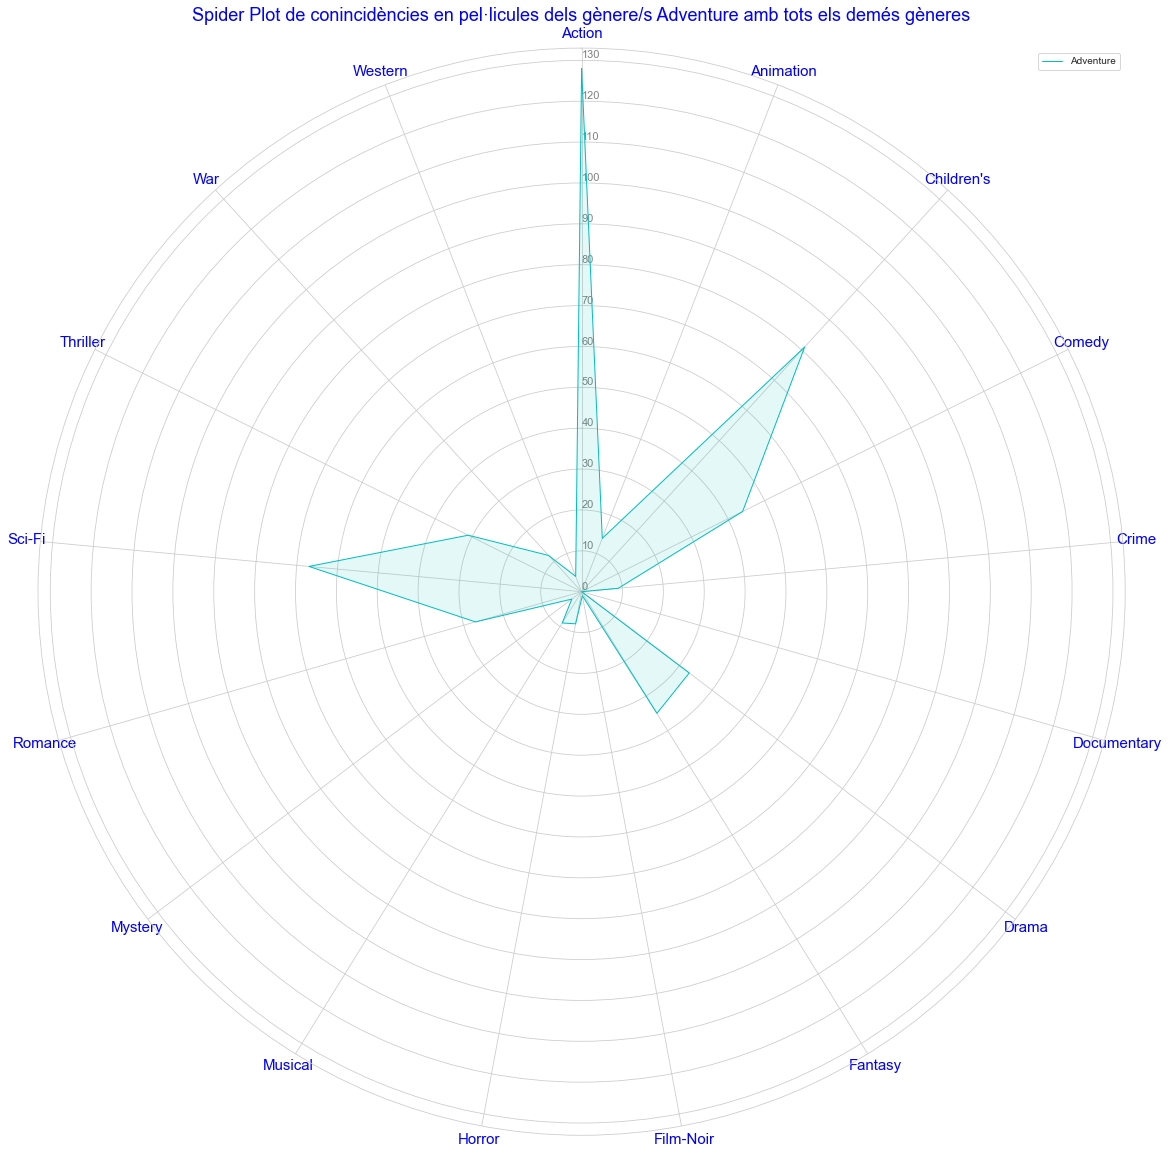

In [62]:
#executem amb 1 genere de base
dibuixa()

quants gèneres vols evaluar?2
0 Action
1 Adventure
2 Animation
3 Children's
4 Comedy
5 Crime
6 Documentary
7 Drama
8 Fantasy
9 Film-Noir
10 Horror
11 Musical
12 Mystery
13 Romance
14 Sci-Fi
15 Thriller
16 War
17 Western
Introdueix l'índex del primer gènere a evaluar
10
Has elegit:  Horror 

Introdueix l'índex del segon gènere a evaluar
14
Has elegit:  Sci-Fi 



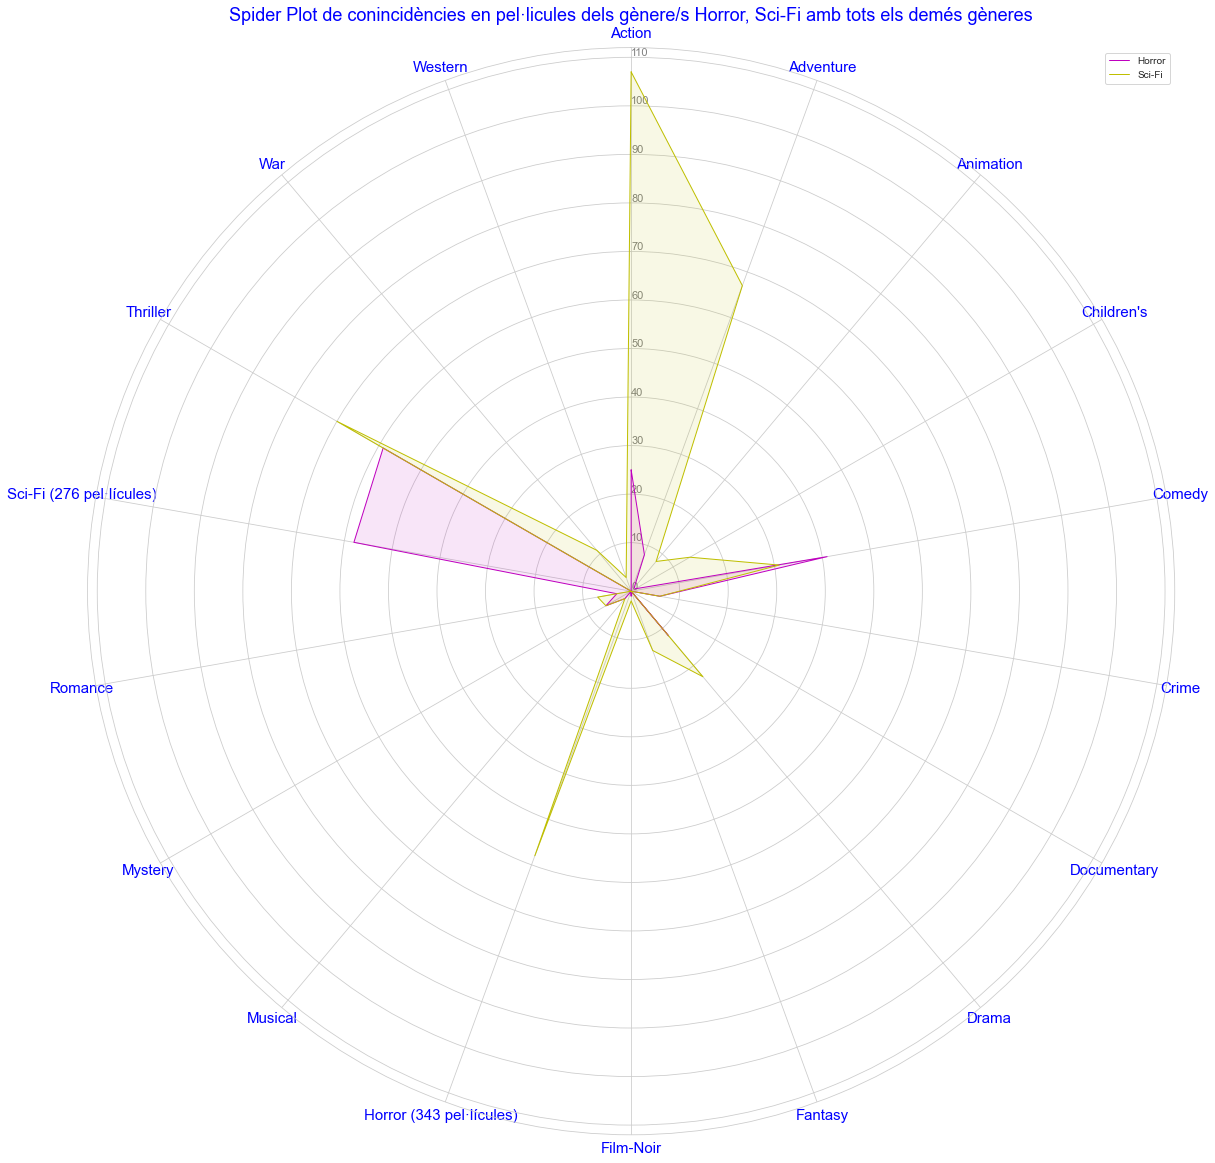

In [63]:
#dos gèneres
dibuixa()

quants gèneres vols evaluar?3
0 Action
1 Adventure
2 Animation
3 Children's
4 Comedy
5 Crime
6 Documentary
7 Drama
8 Fantasy
9 Film-Noir
10 Horror
11 Musical
12 Mystery
13 Romance
14 Sci-Fi
15 Thriller
16 War
17 Western
Introdueix l'índex del primer gènere a evaluar
7
Has elegit:  Drama 

Introdueix l'índex del segon gènere a evaluar
0
Has elegit:  Action 

Introdueix l'índex del tercer gènere a evaluar
4
Has elegit:  Comedy 



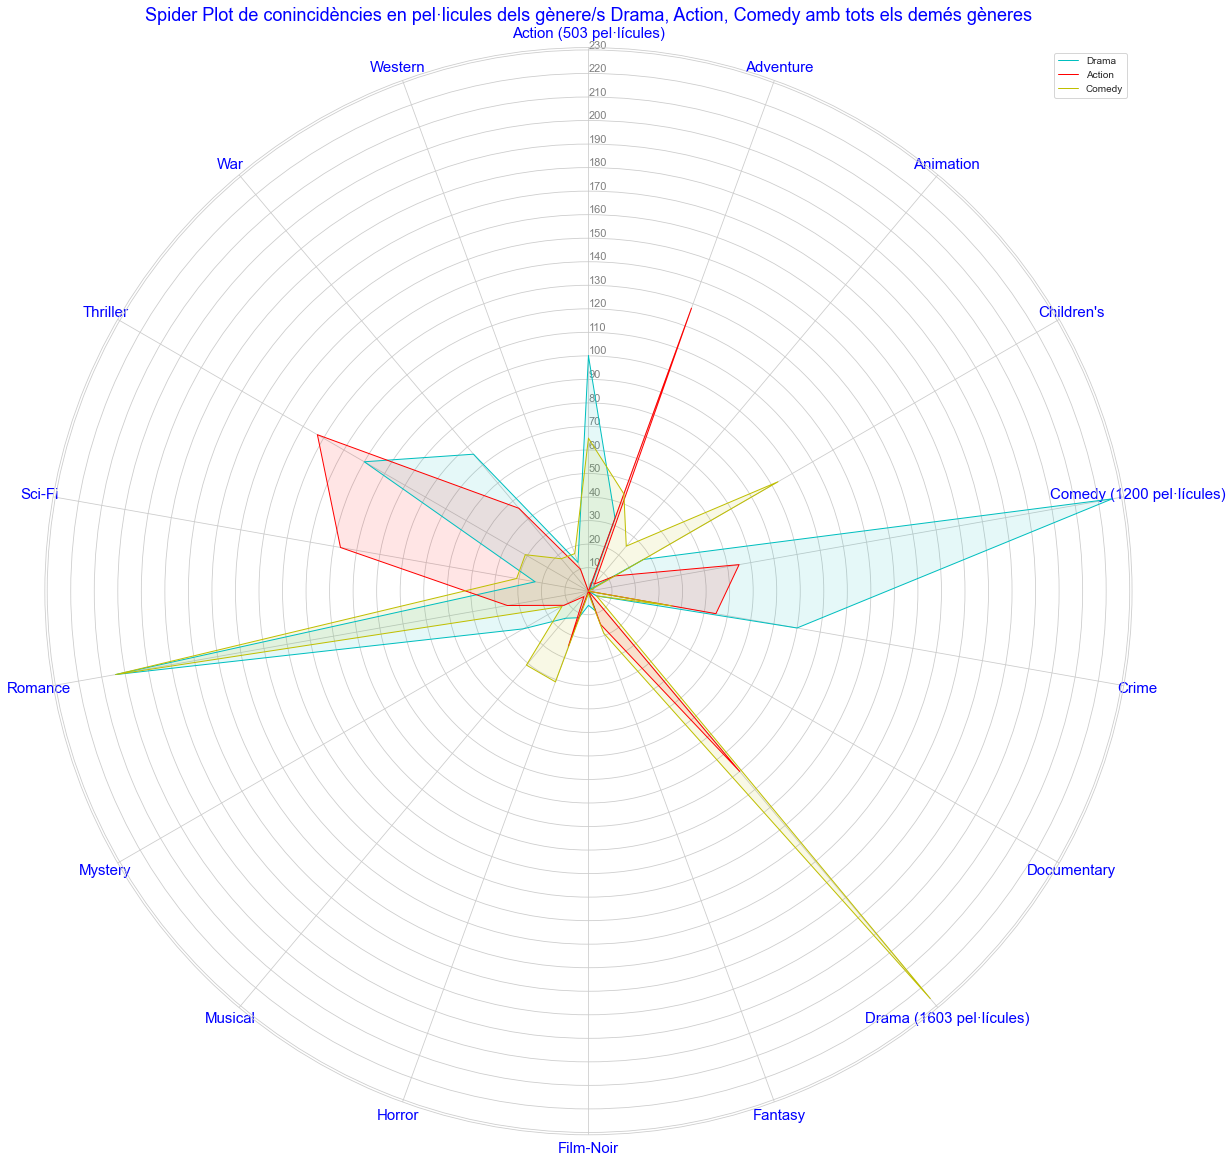

In [65]:
#tres gèneres
dibuixa()